In [ ]:
# ======================================
# Paso 1: Configuración inicial
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ajustes de pandas para ver más columnas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 120)

In [ ]:
# ======================================
# Paso 2: Cargar el dataset
# ======================================
# Si estás en Colab, primero sube el archivo o usa un path relativo

df = pd.read_csv("medicines.csv", low_memory=False)

print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (23939, 13)


,disease_name,disease_url,med_name,med_url,final_price,price,prescription_required,drug_varient,drug_manufacturer,drug_manufacturer_origin,drug_content,generic_name,img_urls
0,ADHD (7),https://www.netmeds.com/prescriptions/adhd,Atrest 25mg Tablet 10'S,https://www.netmeds.com/prescriptions/atrest-25mg-tablet-10-s,₹335.68,MRP ₹381.46 Save 12 %,Rx required,*10 Tablet(s) in a Strip,* Mkt: Centaur Pharmaceuticals Pvt Ltd,* Country of Origin: India,INTRODUCTION ABOUT ATREST 25MG TABLETATREST 25MG TABLET contains Tetrabenazine which belongs to the group of medicin...,Generic Name Tetrabenazine 25 mg,"https://www.netmeds.com/images/product-v1/600x600/847249/atrest_25mg_tablet_10_s_0.jpg, https://www.netmeds.com/imag..."
1,ADHD (7),https://www.netmeds.com/prescriptions/adhd,Capnea Injection 1ml,https://www.netmeds.com/prescriptions/capnea-injection-1ml,₹246.88,MRP ₹280.55 Save 12 %,Rx required,NaN,* Mkt: Cipla Ltd,* Country of Origin: India,INTRODUCTION ABOUT CAPNEA INJECTIONCAPNEA INJECTION contains Caffeine which belongs to the group of medicines called...,Generic Name Caffeine 20 mg,https://www.netmeds.com/images/product-v1/600x600/349693/capnea_injection_1ml_0.jpg
2,ADHD (7),https://www.netmeds.com/prescriptions/adhd,Capnea Oral Solution 1ml,https://www.netmeds.com/prescriptions/capnea-solution-1ml,MRP ₹275.15,MRP ₹ 275.15,Rx required,NaN,* Mkt: Cipla Ltd,* Country of Origin: India,INTRODUCTION ABOUT CAPNEA SOLUTIONCAPNEA SOLUTION contains Caffeine which belongs to the group of medicines called C...,Generic Name Caffeine 20 mg,"https://www.netmeds.com/images/product-v1/600x600/349695/capnea_oral_solution_1ml_0_0.jpg, https://www.netmeds.com/i..."
3,ADHD (7),https://www.netmeds.com/prescriptions/adhd,Cognistar 30mg Injection 1'S,https://www.netmeds.com/prescriptions/cognistar-30mg-injection,₹706.02,MRP ₹802.30 Save 12 %,Rx required,NaN,* Mkt: Lupin Ltd,* Country of Origin: India,INTRODUCTIONCOGNISTAR 30MG contains Cerebroprotein Hydrolysate which belongs to the group of medicines called Neurot...,Generic Name Cerebroprotein Hydrolysate 30 mg,"https://www.netmeds.com/images/product-v1/600x600/370785/cognistar_30mg_injection_1s_0_0.jpg, https://www.netmeds.co..."
4,ADHD (7),https://www.netmeds.com/prescriptions/adhd,Cognistar 60mg Injection 1's,https://www.netmeds.com/prescriptions/cognistar-60mg-injection,₹1314.90,MRP ₹1494.20 Save 12 %,Rx required,NaN,* Mkt: Lupin Ltd,* Country of Origin: India,INTRODUCTION ABOUT COGNISTAR 60MG INJECTIONCOGNISTAR 60MG INJECTION contains Cerebroprotein Hydrolysate which belong...,Generic Name Cerebroprotein Hydrolysate 60 mg,https://www.netmeds.com/images/product-v1/600x600/370786/cognistar_60mg_injection_0.jpg


In [ ]:
# ======================================
# Paso 3: Información general de los datos
# ======================================
df.info()

# Resumen de nulos
missing = df.isna().sum().sort_values(ascending=False)
print("\nValores nulos por columna:\n", missing.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23939 entries, 0 to 23938
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   disease_name              23939 non-null  object
 1   disease_url               23939 non-null  object
 2   med_name                  23939 non-null  object
 3   med_url                   23939 non-null  object
 4   final_price               23939 non-null  object
 5   price                     23181 non-null  object
 6   prescription_required     21109 non-null  object
 7   drug_varient              15199 non-null  object
 8   drug_manufacturer         23760 non-null  object
 9   drug_manufacturer_origin  23760 non-null  object
 10  drug_content              23756 non-null  object
 11  generic_name              23569 non-null  object
 12  img_urls                  23760 non-null  object
dtypes: object(13)
memory usage: 2.4+ MB

Valores nulos por columna:
 drug_varien

Distribución absoluta:
 prescription_required
Rx required    21109
Name: count, dtype: int64

Distribución relativa (%):
 prescription_required
Rx required    100.0
Name: proportion, dtype: float64


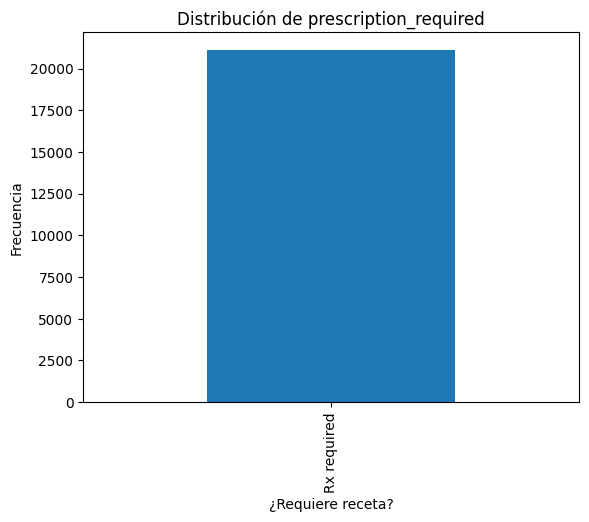

In [ ]:
# ======================================
# Paso 4: Distribución de la variable objetivo
# ======================================
target_col = "prescription_required"

if target_col in df.columns:
    print("Distribución absoluta:\n", df[target_col].value_counts())
    print("\nDistribución relativa (%):\n", df[target_col].value_counts(normalize=True)*100)

    # Gráfico de barras
    df[target_col].value_counts().plot(kind="bar", title="Distribución de prescription_required")
    plt.xlabel("¿Requiere receta?")
    plt.ylabel("Frecuencia")
    plt.show()


In [ ]:
# ======================================
# Paso 5: Estadísticos descriptivos
# ======================================
num_cols = ["price", "final_price"]
df[num_cols].describe()


,price,final_price
count,23181,23939
unique,8827,9519
top,MRP ₹150.00 Save 12 %,Error
freq,101,179


In [ ]:
# ======================================
# Paso 6: Detectar duplicados y revisar categorías principales
# ======================================
print("Filas duplicadas:", df.duplicated().sum())

# Cardinalidad de columnas categóricas importantes
for col in ["disease_name", "drug_manufacturer", "drug_manufacturer_origin", "generic_name"]:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} valores únicos")


Filas duplicadas: 0
disease_name: 141 valores únicos
drug_manufacturer: 651 valores únicos
drug_manufacturer_origin: 30 valores únicos
generic_name: 6377 valores únicos


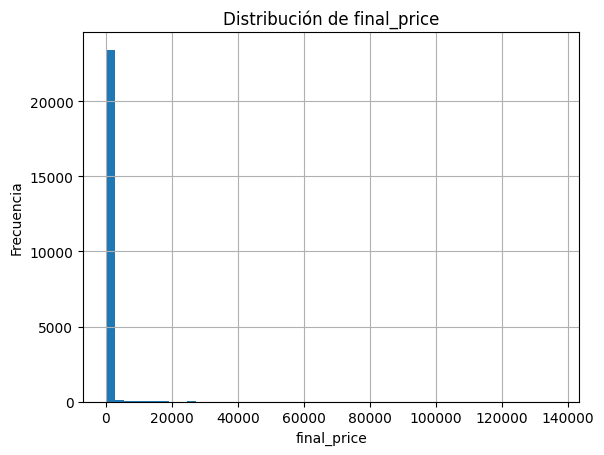

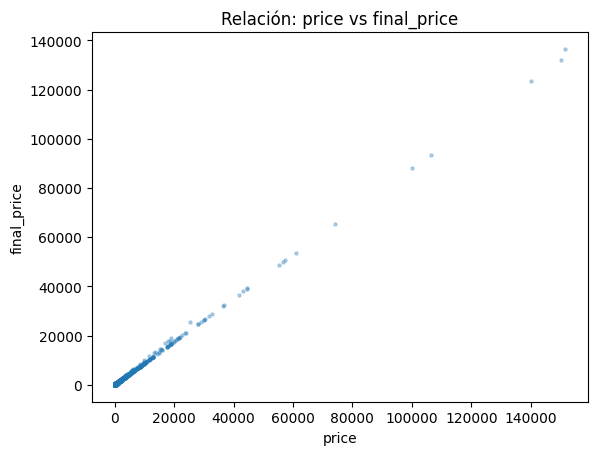

/tmp/ipython-input-3732692935.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


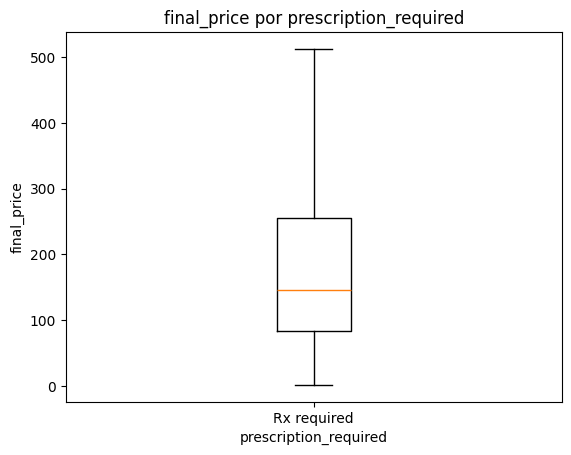

In [ ]:
# ======================================
# Paso 7: Visualizaciones iniciales (con limpieza segura)
# ======================================

import re

# --- Limpieza numérica básica para price y final_price ---
for col in ["price", "final_price"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "", regex=False)            # separadores de miles
            .str.replace(r"[^\d\.\-]", "", regex=True)    # símbolos/leyendas (₹, $, etc.)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# --- 7.1 Histograma de final_price ---
if "final_price" in df.columns:
    df["final_price"].dropna().hist(bins=50)
    plt.title("Distribución de final_price")
    plt.xlabel("final_price")
    plt.ylabel("Frecuencia")
    plt.show()
else:
    print("No existe la columna 'final_price' para el histograma.")

# --- 7.2 Relación price vs final_price (scatter) ---
if {"price", "final_price"}.issubset(df.columns):
    m = df["price"].notna() & df["final_price"].notna()
    if m.any():
        plt.scatter(df.loc[m, "price"], df.loc[m, "final_price"], alpha=0.3, s=5)
        plt.title("Relación: price vs final_price")
        plt.xlabel("price")
        plt.ylabel("final_price")
        plt.show()
    else:
        print("price/final_price no tienen datos numéricos tras la limpieza.")
else:
    print("Faltan columnas 'price' o 'final_price' para el scatter.")

# --- 7.3 Boxplot de final_price por prescription_required ---
target_col = "prescription_required"
if "final_price" in df.columns and target_col in df.columns:
    vals = df[target_col].dropna().unique().tolist()
    groups, labels = [], []
    for v in vals:
        g = df.loc[df[target_col] == v, "final_price"].dropna()
        if len(g) > 0:
            groups.append(g)
            labels.append(str(v))

    if groups:
        plt.boxplot(groups, labels=labels, showfliers=False)
        plt.title("final_price por prescription_required")
        plt.xlabel(target_col)
        plt.ylabel("final_price")
        plt.show()
    else:
        print("No hay datos suficientes para el boxplot (final_price vacío por clase).")
else:
    print("Faltan 'final_price' o 'prescription_required' para el boxplot.")


# Paso 8: Hallazgos preliminares

- Se identificó que la variable objetivo `prescription_required` está desbalanceada (la mayoría de los medicamentos pertenecen a una categoría).  
- Existen valores nulos en columnas como `drug_content`, que requieren limpieza o imputación.  
- Los precios (`price` y `final_price`) presentan outliers y deben ser tratados antes de modelar.  
- Algunas variables categóricas tienen cardinalidad muy alta (ejemplo: `generic_name`, `med_name`), lo cual puede dificultar el modelado si no se codifican adecuadamente.  
- Próximos pasos: tratamiento de nulos, análisis de outliers, codificación de variables categóricas y preparación de features textuales (`drug_content`).  


=== Valores faltantes por columna ===


,Nulos,Porcentaje
drug_varient,8740,36.51
price,3013,12.59
prescription_required,2830,11.82
generic_name,370,1.55
drug_content,183,0.76
final_price,179,0.75
drug_manufacturer,179,0.75
drug_manufacturer_origin,179,0.75
img_urls,179,0.75
med_url,0,0.00



=== Registros duplicados ===
Total de registros duplicados: 0

=== Estadísticos descriptivos de precios ===


,price,final_price
count,20926.000000,23760.000000
mean,401.763396,375.535661
std,2636.848414,2301.183179
min,1.901000,1.710000
25%,91.601200,87.120000
50%,161.701200,152.605000
75%,287.790900,275.000000
max,151670.001000,136503.000000


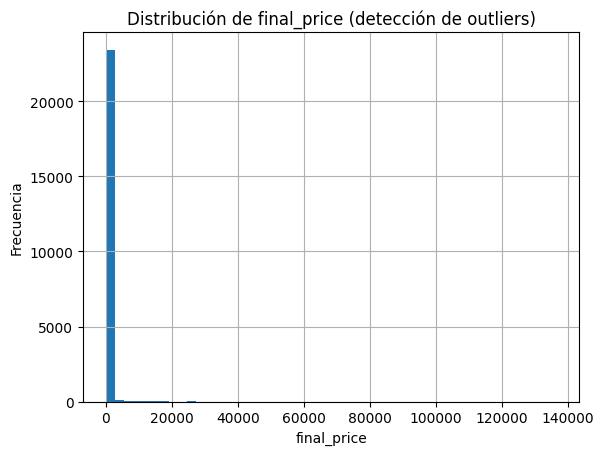

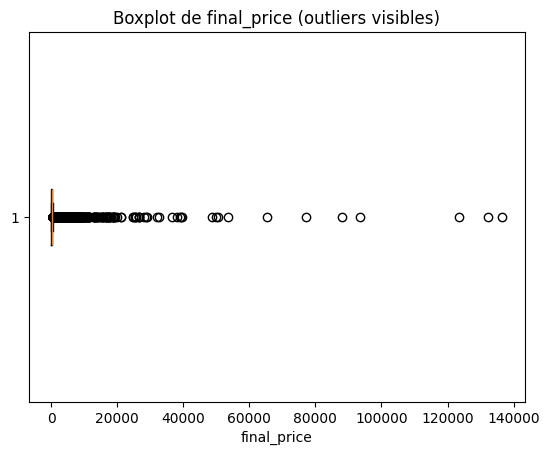

In [12]:
# ======================================
# Paso extra: Análisis de calidad de datos
# ======================================

print("=== Valores faltantes por columna ===")
missing = (
    df.isna().sum()
    .to_frame("Nulos")
    .assign(Porcentaje=lambda x: (x["Nulos"]/len(df)*100).round(2))
    .sort_values("Nulos", ascending=False)
)
display(missing.head(10))  # muestra las 10 columnas con más nulos

print("\n=== Registros duplicados ===")
duplicados = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

print("\n=== Estadísticos descriptivos de precios ===")
desc_prices = df[["price", "final_price"]].describe()
display(desc_prices)

# Histograma para visualizar outliers en final_price
df["final_price"].dropna().hist(bins=50)
plt.title("Distribución de final_price (detección de outliers)")
plt.xlabel("final_price")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de final_price para ver dispersión y outliers
plt.boxplot(df["final_price"].dropna(), vert=False, showfliers=True)
plt.title("Boxplot de final_price (outliers visibles)")
plt.xlabel("final_price")
plt.show()
